# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import geoviews as gv
from geoviews import tile_sources as gvts
gv.extension('bokeh')
import requests

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,qui nhon,13.7667,109.2333,298.24,89,22,4.96,VN,1712093299
1,1,avarua,-21.2078,-159.7750,302.18,74,75,4.12,CK,1712093299
2,2,swift current,50.2834,-107.8014,287.60,38,0,6.17,CA,1712093098
3,3,chui,-33.6971,-53.4616,290.49,70,4,3.04,UY,1712093206
4,4,fort bragg,35.1390,-79.0060,303.82,49,20,5.66,US,1712093301


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
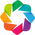

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]   (continent,pop_est)
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Lng,Lat]   (Humidity,City)

In [3]:
#%%capture --no-display

import geoviews as gv
import geoviews.tile_sources as gvts
import holoviews as hv
import geopandas as gpd
import hvplot.pandas

#Explicitly call bokeh (dynamic viz) and matplotlib (static viz)
#gv.extension('bokeh', 'matplotlib')

gv.extension('bokeh', 'matplotlib')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

continents = gv.Polygons(world, vdims=['continent', 'pop_est']).opts(
    tools=['hover'], alpha=0.5, color='lightgray'
)

#Display the map - I used this library and legend to better represent visually the spectrum of humidity ranges globally.
map_plot_humidity = gvts.OSM * city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo=True, 
    size='Humidity',
    color='Humidity',
    cmap='coolwarm',
    hover_cols=['City'],
    global_extent=True
)

#tile_source=gvts.OSM()

final_plot = continents * map_plot_humidity

#Display the map
final_plot



### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
#Convert Kelvin to Celsius temps
city_data_df['Max Temp Celsius'] = city_data_df['Max Temp'] - 273.15

# Narrow down cities that fit criteria and drop any results with null values
ideal_conds_df = city_data_df[
    (city_data_df['Max Temp Celsius'] > 13) & (city_data_df['Max Temp Celsius'] < 27) &
    (city_data_df['Cloudiness'] > 0) & (city_data_df['Cloudiness'] < 10) &
    (city_data_df['Wind Speed'] > 0) & (city_data_df['Wind Speed'] < 5)
].dropna(subset=['Max Temp', 'Cloudiness', 'Wind Speed']) #Drop any rows with null values

# Display sample data
ideal_conds_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp Celsius
3,3,chui,-33.6971,-53.4616,290.49,70,4,3.04,UY,1712093206,17.34
12,12,castillos,-34.1667,-53.8333,289.97,69,2,2.88,UY,1712093304,16.82
93,93,tunceli,39.1083,39.5471,287.80,51,1,1.41,TR,1712093341,14.65
114,114,thames,-37.1333,175.5333,290.22,63,3,0.67,NZ,1712093351,17.07
120,120,richards bay,-28.7830,32.0377,295.05,90,2,1.57,ZA,1712093354,21.90
197,197,chinchilla,-26.7500,150.6333,296.49,85,6,0.89,AU,1712093390,23.34
209,209,east london,-33.0153,27.9116,292.53,68,9,4.13,ZA,1712093395,19.38
260,260,sarupathar,26.1984,93.8094,292.79,89,1,1.71,IN,1712093424,19.64
274,274,sweet home,44.3976,-122.7362,297.33,52,2,1.34,US,1712093431,24.18
298,298,empangeni,-28.7620,31.8933,293.76,95,4,1.64,ZA,1712093442,20.61


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
city_data_df = pd.DataFrame(city_data_df)

hotel_df = city_data_df.copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel'] = ''

# Display sample data
hotel_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp Celsius,Hotel
0,0,qui nhon,13.7667,109.2333,298.24,89,22,4.96,VN,1712093299,25.09,
1,1,avarua,-21.2078,-159.7750,302.18,74,75,4.12,CK,1712093299,29.03,
2,2,swift current,50.2834,-107.8014,287.60,38,0,6.17,CA,1712093098,14.45,
3,3,chui,-33.6971,-53.4616,290.49,70,4,3.04,UY,1712093206,17.34,
4,4,fort bragg,35.1390,-79.0060,303.82,49,20,5.66,US,1712093301,30.67,
...,...,...,...,...,...,...,...,...,...,...,...,...
600,600,arrifes,37.7667,-25.7000,290.33,88,75,10.29,PT,1712093577,17.18,
601,601,porto novo,6.4965,2.6036,304.05,82,90,3.62,BJ,1712093404,30.90,
602,602,curvelo,-18.7564,-44.4308,296.29,89,100,1.25,BR,1712093396,23.14,
603,603,poltavka,54.3663,71.7632,270.55,91,74,3.51,RU,1712093579,-2.60,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = 10000
categories = "accommodation.hotel"
limit = 20

# Set the parameters for the type of search
#filters = f"circle:{longitude},{latitude},{radius}"
#bias = f"proximity:{longitude},{latitude}"

params = {
    "categories":categories,
    "limit":limit,
    #"filter":filters,
    #"bias":bias,
    "apiKey":geoapify_key 
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    latitude, longitude = row['Lat'], row['Lng']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"
    params["filter"] = filters
    params["bias"] = bias
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionaty
    response = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address_json = response.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address_json["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
qui nhon - nearest hotel: TMS Quy Nhơn - Home ở đây!
avarua - nearest hotel: Paradise Inn
swift current - nearest hotel: Days Inn
chui - nearest hotel: Alerces
fort bragg - nearest hotel: Airborne Inn Lodging
ola - nearest hotel: No hotel found
whitehorse - nearest hotel: Town & Mountain Hotel
bilibino - nearest hotel: No hotel found
wailua homesteads - nearest hotel: Hilton Garden Inn Kauai Wailua Bay
puerto natales - nearest hotel: Dorotea Patagonia Hostel
jamestown - nearest hotel: DoubleTree Jamestown
hithadhoo - nearest hotel: Pebbles Inn
castillos - nearest hotel: A mi gente
dawson creek - nearest hotel: Comfort Inn
anar darah - nearest hotel: No hotel found
port mathurin - nearest hotel: Escale Vacances
longyearbyen - nearest hotel: The Vault
aykhal - nearest hotel: Уют
bethel - nearest hotel: Hampton Inn Danbury
polyarnyy - nearest hotel: No hotel found
isla mujeres - nearest hotel: Villa La Bella
santeramo in colle - nearest hotel: Hotel Murgia
plainview 

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp Celsius,Hotel,Hotel Name
0,0,qui nhon,13.7667,109.2333,298.24,89,22,4.96,VN,1712093299,25.09,,TMS Quy Nhơn - Home ở đây!
1,1,avarua,-21.2078,-159.7750,302.18,74,75,4.12,CK,1712093299,29.03,,Paradise Inn
2,2,swift current,50.2834,-107.8014,287.60,38,0,6.17,CA,1712093098,14.45,,Days Inn
3,3,chui,-33.6971,-53.4616,290.49,70,4,3.04,UY,1712093206,17.34,,Alerces
4,4,fort bragg,35.1390,-79.0060,303.82,49,20,5.66,US,1712093301,30.67,,Airborne Inn Lodging
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,600,arrifes,37.7667,-25.7000,290.33,88,75,10.29,PT,1712093577,17.18,,No hotel found
601,601,porto novo,6.4965,2.6036,304.05,82,90,3.62,BJ,1712093404,30.90,,Hôtel 6500 CFA
602,602,curvelo,-18.7564,-44.4308,296.29,89,100,1.25,BR,1712093396,23.14,,Hotel Bandeirante
603,603,poltavka,54.3663,71.7632,270.55,91,74,3.51,RU,1712093579,-2.60,,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
#%%capture --no-display

#Explicitly call bokeh (dynamic viz) and matplotlib (static viz)
#gv.extension('bokeh', 'matplotlib')

#Display the map
#map_plot_humidity = gvts.OSM * hotel_df.hvplot.points(
    #"Lng",
    #"Lat",
    #geo=True, 
    #size='Humidity',
    #color='Humidity',
    #cmap='coolwarm',
    #hover_cols=['City', 'Hotel Name'],
    #global_extent=True
#)

#tile_source=gvts.OSM()

#final_hotel_plot = tile_source * map_plot_humidity

#Display the map
#final_hotel_plot

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
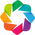

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]   (continent,pop_est)
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Lng,Lat]   (Humidity,City,Hotel Name)

In [8]:
import geoviews as gv
import geoviews.tile_sources as gvts
import holoviews as hv
import geopandas as gpd
from holoviews.operation.datashader import rasterize

# Assuming hotel_df is your DataFrame containing hotel locations with 'Lng', 'Lat', and 'Humidity' columns

gv.extension('bokeh', 'matplotlib')

# Load continents geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the GeoDataFrame to a GeoViews object
continents = gv.Polygons(world, vdims=['continent', 'pop_est'])

# Define the map with hotel locations - I used this library and legend to better represent visually the spectrum of humidity ranges globally. 
map_plot_humidity = gvts.OSM * hotel_df.hvplot.points(
    "Lng",
    "Lat",
    geo=True, 
    size='Humidity',
    color='Humidity',
    cmap='coolwarm',
    hover_cols=['City', 'Hotel Name'],
    global_extent=True
)

# Combine the continents overlay with the hotel locations map
final_hotel_plot = continents * map_plot_humidity

# Display the map
final_hotel_plot
